In [1]:
import cirq
import math
from cirq.contrib.svg import SVGCircuit
import sympy
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
## DEFINITION
N = 4
D=2
#D = sympy.symbols("D")
A = sympy.symbols("A")
##sigma=np.zeros((N,N))
sigma = sympy.symbols([["sigma_"+str(i)+"_"+str(j) for i in range(N)] for j in range(N)])
y = np.zeros(N)
qubits = [cirq.LineQubit(i) for i in range(2*N)]
L=len(qubits)
index_grid_pair = [(2*i,2*i+1) for i in range(0,N) ]
mu = sympy.symbols(["μ_"+str(k) for k in range(N)])
lam,gamma = sympy.symbols("λ, γ")

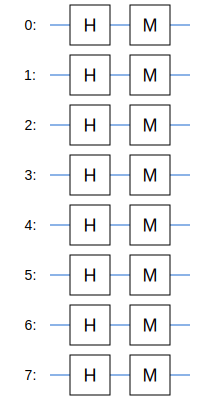

In [13]:
## INITIALIZATION

hadamard=cirq.Circuit()
measurements=cirq.Circuit()
for i in range(L):
    hadamard.append(cirq.H(qubits[i]))
    measurements.append(cirq.measure(qubits[i]))

circuit = cirq.Circuit((hadamard,measurements))

#print(circuit)
SVGCircuit(circuit)

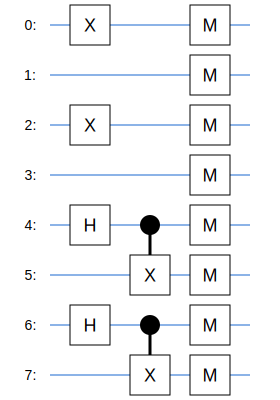

In [35]:
##INITIALIZATION_HARD AND MEASURE        
initial_hard = cirq.Circuit()
for i in range(int(D)):
        initial_hard.append(cirq.X(qubits[index_grid_pair[i][0]]))
for i in range(int(D), N):
                initial_hard.append(cirq.H(qubits[index_grid_pair[i][0]]))
                initial_hard.append(cirq.CNOT(qubits[index_grid_pair[i][0]], qubits[index_grid_pair[i][1]]))

circuit=cirq.Circuit(initial_hard, measurements)
     
SVGCircuit(circuit)

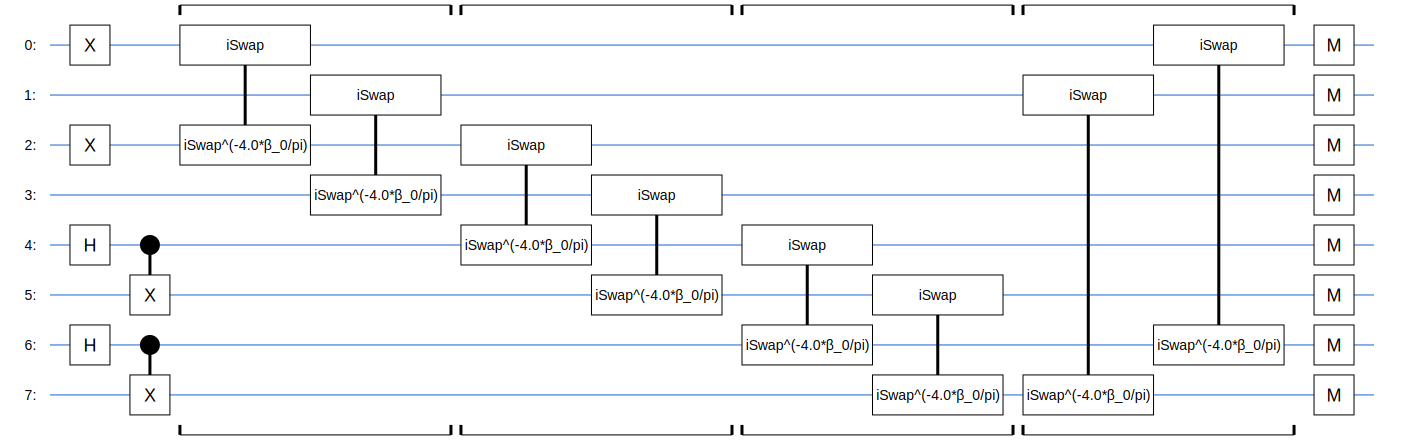

In [37]:
## Mixer Hard 
beta_list = ["β_"+str(i) for i in range(1)]
betas = sympy.symbols(beta_list)
mixer_hard = cirq.Circuit()

for i in range(0,2*N-2,2):
    mixer_hard.append(cirq.ISwapPowGate(exponent=(4.0*(-betas[0])/sympy.pi)).on(qubits[i],qubits[i+2]))
    
for i in range(1,2*N-2,2):
    mixer_hard.append(cirq.ISwapPowGate(exponent=(4.0*(-betas[0])/sympy.pi)).on(qubits[i],qubits[i+2]))

mixer_hard.append(cirq.ISwapPowGate(exponent=(4.0*(-betas[0])/sympy.pi)).on(qubits[2*N-1],qubits[1]))
mixer_hard.append(cirq.ISwapPowGate(exponent=(4.0*(-betas[0])/sympy.pi)).on(qubits[2*N-2],qubits[0]))

circuit = cirq.Circuit(initial_hard,mixer_hard,measurements)
SVGCircuit(circuit)

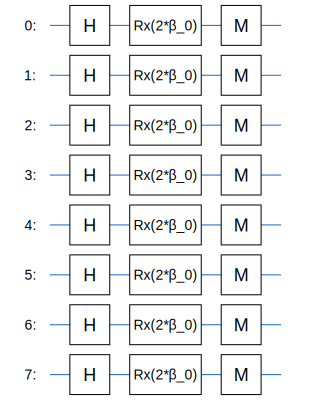

In [90]:
## MIXER OPERATOR
beta_list = ["β_"+str(i) for i in range(1)]
mixer=cirq.Circuit()
betas = sympy.symbols(beta_list)
for i in range(L):
    mixer.append(cirq.rx(2*betas[0]).on(qubits[i]))
circuit = cirq.Circuit((hadamard,mixer,measurements))
SVGCircuit(circuit)


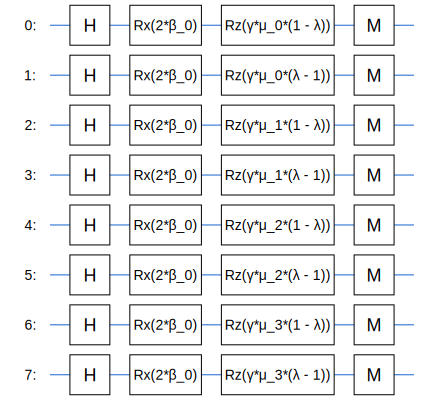

In [91]:
## RETURNS OPERATOR
returns=cirq.Circuit()
for i in range(L):
    returns.append(cirq.rz((-1)**int(i)*(1-lam)*gamma*mu[int(i/2)]).on(qubits[i]))

circuit = cirq.Circuit((hadamard,mixer,returns,measurements))

SVGCircuit(circuit)

In [92]:
combinations=[]
for i in range(L):
    for j in range(L):
        if i!=j:
            combinations.append((i,j))
numcombinations=len(combinations)

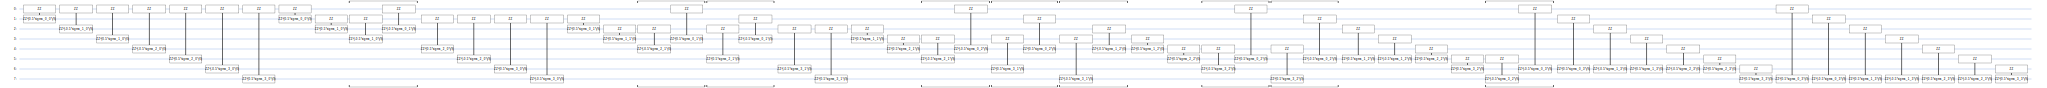

In [95]:
## RISK OPERATOR
risk=cirq.Circuit()
for i in range(numcombinations):
    q1=combinations[i][0]
    q2=combinations[i][1]
    ii=math.floor(q1/2)
    jj=math.floor(q2/2)
    sign=-(-1)**((q1 % 2)+(q2 %2))
    risk.append(cirq.ZZPowGate(exponent= 1/2*sign*gamma*lam*sigma[ii][jj]).on(qubits[q1],qubits[q2]))
SVGCircuit(risk)

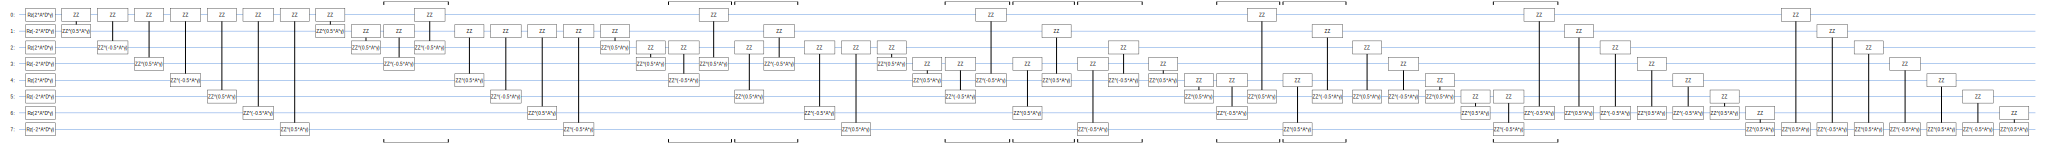

In [100]:
##  Constraint
constraint=cirq.Circuit()
for i in range(len(qubits)):
    sign=(-1)**i
    constraint.append(cirq.rz( sign *2 *gamma*A*D).on(qubits[i]))
for i in range(numcombinations):
    q1=combinations[i][0]
    q2=combinations[i][1]
    sign=-(-1)**((q1 % 2)+(q2 %2))
    constraint.append(cirq.ZZPowGate(exponent= 1/2*sign*A*gamma).on(qubits[q1],qubits[q2]))

circuit = cirq.Circuit((constraint))
SVGCircuit(circuit)


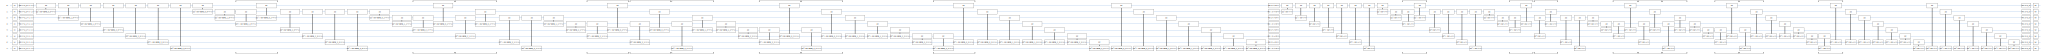

In [104]:
circuit=cirq.Circuit(hadamard, returns, risk, constraint, mixer, measurements)
SVGCircuit(circuit)

In [55]:
sigma[0][3]

sigma_3_0